# IMPORTS

In [1]:
# BASIC IMPORTS
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import joblib
from sklearn.pipeline import Pipeline


# MODELLING
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier,
                                AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# MODEL SELECETION
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import ( r2_score, mean_absolute_error, mean_squared_error,
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, precision_score, recall_score, f1_score, log_loss,
    matthews_corrcoef, cohen_kappa_score, accuracy_score, roc_curve, auc, 
)


In [2]:
df = pd.read_csv(r'C:\Users\kabee\OneDrive\Desktop\DS PROJ 2\Culinary-Compass\NOTEBOOK\DATA\Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
nan_values = df.isna().sum()
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


Columns with NaN values:
Cuisines    9
dtype: int64


In [8]:
df['City'] = df['City'].replace({
    'Bras�_lia': 'Brazil',
    'S��o Paulo': 'Sao Paulo',
    '��stanbul': 'Istanbul'
})


In [9]:
most_frequent_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'] = df['Cuisines'].fillna(most_frequent_cuisine)

In [10]:
nan_values = df.isna().sum()
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


Columns with NaN values:
Series([], dtype: int64)


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

if len(numerical_features)>len(categorical_features):
    categorical_features.extend([' '] * (len(numerical_features) - len(categorical_features)))
elif len(numerical_features)<len(categorical_features):
    numerical_features.extend([' '] * (len(categorical_features) - len(numerical_features)))


features = pd.DataFrame({
'Numerical': numerical_features,
'Categorical': categorical_features
})

features


,Numerical,Categorical
0,Restaurant ID,Restaurant Name
1,Country Code,City
2,Longitude,Address
3,Latitude,Locality
4,Average Cost for two,Locality Verbose
5,Price range,Cuisines
6,Aggregate rating,Currency
7,Votes,Has Table booking
8,,Has Online delivery
9,,Is delivering now


In [12]:
cf_vals = pd.DataFrame({
    'Cat Feature': categorical_features,
    'Values': [df[feature].unique().tolist() for feature in categorical_features]
})
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  

cf_vals

Cat Feature  \
0        Restaurant Name   
1                   City   
2                Address   
3               Locality   
4       Locality Verbose   
5               Cuisines   
6               Currency   
7      Has Table booking   
8    Has Online delivery   
9      Is delivering now   
10  Switch to order menu   
11          Rating color   
12           Rating text   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [13]:
numerical_features

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
df = df.drop(['Restaurant ID', 'Address', 'Locality Verbose'], axis=1)

In [16]:
df.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode Rating text
le_rating_text = LabelEncoder()
df['Rating text'] = le_rating_text.fit_transform(df['Rating text'])

# Encode Rating color
le_rating_color = LabelEncoder()
df['Rating color'] = le_rating_color.fit_transform(df['Rating color'])


In [18]:
df.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,0,1,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,0,1,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,1,5,270
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,0,1,365
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,0,1,229


In [19]:
binary_vars = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

In [20]:
#one-hot encoding
df = pd.get_dummies(df, columns=binary_vars, dtype=int)

In [21]:
df.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,...,Rating color,Rating text,Votes,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Switch to order menu_No
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),3,...,0,1,314,0,1,1,0,1,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),3,...,0,1,591,0,1,1,0,1,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,...,1,5,270,0,1,1,0,1,0,1
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),4,...,0,1,365,1,0,1,0,1,0,1
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),4,...,0,1,229,0,1,1,0,1,0,1


In [22]:
scaler = StandardScaler()
df[['Longitude', 'Latitude', 'Average Cost for two']] = scaler.fit_transform(df[['Longitude', 'Latitude', 'Average Cost for two']])


In [23]:
df.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,...,Rating color,Rating text,Votes,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Switch to order menu_No
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",1.372269,-1.025581,"French, Japanese, Desserts",-0.006154,Botswana Pula(P),3,...,0,1,314,0,1,1,0,1,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",1.371945,-1.026647,Japanese,0.000049,Botswana Pula(P),3,...,0,1,591,0,1,1,0,1,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",1.372975,-1.024131,"Seafood, Asian, Filipino, Indian",0.173743,Botswana Pula(P),4,...,1,5,270,0,1,1,0,1,0,1
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",1.372966,-1.023775,"Japanese, Sushi",0.018659,Botswana Pula(P),4,...,0,1,365,1,0,1,0,1,0,1
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",1.372991,-1.023854,"Japanese, Korean",0.018659,Botswana Pula(P),4,...,0,1,229,0,1,1,0,1,0,1


In [24]:
# Splitting Cuisines into separate columns
cuisines = df['Cuisines'].str.get_dummies(', ')
df = pd.concat([df, cuisines], axis=1)
df = df.drop(columns=['Cuisines'])


In [25]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Longitude',
       'Latitude', 'Average Cost for two', 'Currency', 'Price range',
       'Aggregate rating',
       ...
       'Teriyaki', 'Tex-Mex', 'Thai', 'Tibetan', 'Turkish', 'Turkish Pizza',
       'Vegetarian', 'Vietnamese', 'Western', 'World Cuisine'],
      dtype='object', length=165)

In [26]:
df = df.drop(columns=['Average Cost for two', 'Currency'])

In [27]:
df.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Price range,Aggregate rating,Rating color,Rating text,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",1.372269,-1.025581,3,4.8,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",1.371945,-1.026647,3,4.5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",1.372975,-1.024131,4,4.4,1,5,...,0,0,0,0,0,0,0,0,0,0
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",1.372966,-1.023775,4,4.9,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",1.372991,-1.023854,4,4.8,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
selected_features = ['Longitude', 'Latitude', 'Price range', 'Votes', 'Rating text', 'Rating color'] + list(cuisines.columns)
X = df[selected_features]
y = df['Aggregate rating']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# REGRESSION MODELS

Model_reg = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

In [31]:
import warnings

warnings.filterwarnings("ignore")

In [32]:
best_model_name = None
best_model_mse = np.inf 
best_r2 = -np.inf

for model_name, model in Model_reg.items():
    
    model.fit(X_train, y_train)                 # Training on train set
    y_pred = model.predict(X_test)              # Predicting on test set
    mse = mean_squared_error(y_test, y_pred)    # Evaluate the model
    rmse = np.sqrt(mse)                         # Calculate RMSE from MSE
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")
    print("-------------------------------------------\n")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = model_name
        best_model = model                      # Best model instance


Linear Regression:
Mean Squared Error (MSE): 1.3388120795294867
Root Mean Squared Error (RMSE): 1.1570704730177357
R-squared (R2) Score: 0.4117979036902588
-------------------------------------------

Lasso:
Mean Squared Error (MSE): 2.0567212860830684
Root Mean Squared Error (RMSE): 1.434127360482
R-squared (R2) Score: 0.0963871700171024
-------------------------------------------

Ridge:
Mean Squared Error (MSE): 1.3316090637112876
Root Mean Squared Error (RMSE): 1.1539536661891099
R-squared (R2) Score: 0.4149625218385399
-------------------------------------------



  File "c:\Users\kabee\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kabee\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kabee\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kabee\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1493, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


K-Neighbors Regressor:
Mean Squared Error (MSE): 0.07818691784406072
Root Mean Squared Error (RMSE): 0.2796192372567752
R-squared (R2) Score: 0.9656488691108638
-------------------------------------------

Decision Tree:
Mean Squared Error (MSE): 0.056316064887493446
Root Mean Squared Error (RMSE): 0.23731006065376462
R-squared (R2) Score: 0.9752577468270375
-------------------------------------------

Random Forest Regressor:
Mean Squared Error (MSE): 0.029808379660697507
Root Mean Squared Error (RMSE): 0.17265103434586632
R-squared (R2) Score: 0.9869037995159254
-------------------------------------------

XGBRegressor:
Mean Squared Error (MSE): 0.029766610393913897
Root Mean Squared Error (RMSE): 0.1725300275138038
R-squared (R2) Score: 0.9869221506875792
-------------------------------------------

CatBoosting Regressor:
Mean Squared Error (MSE): 0.028695216379674964
Root Mean Squared Error (RMSE): 0.16939662446363848
R-squared (R2) Score: 0.9873928636537861
-----------------------

In [33]:
# Best MOdel Stats
print(f"Best Model: {best_model_name}")
print(f"Best Mean Squared Error (MSE): {best_r2}")

Best Model: CatBoosting Regressor
Best Mean Squared Error (MSE): 0.9873928636537861


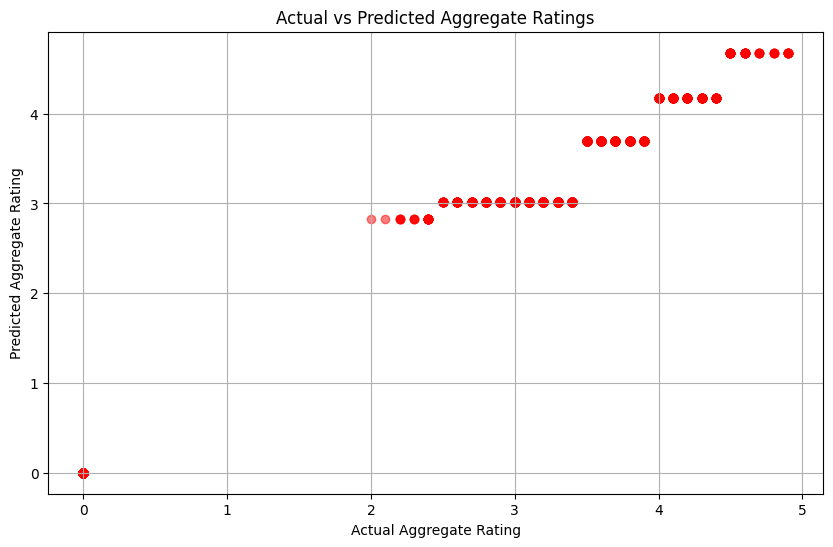

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs Predicted Aggregate Ratings')
plt.grid(True)
plt.show()

In [35]:
if best_model_name in ['Decision Tree', 'Random Forest Regressor', 'XGBRegressor', 'CatBoosting Regressor']:
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    importance_df

if best_model_name in ['Linear Regression', 'Lasso', 'Ridge']:
    coefficients = best_model.coef_
    feature_names = X_train.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    coef_df


In [36]:
importance_df

,Feature,Importance
3,Votes,8.521409e+01
5,Rating color,7.950559e+00
4,Rating text,5.689375e+00
0,Longitude,2.906036e-01
1,Latitude,2.401454e-01
2,Price range,1.727535e-01
40,Chinese,5.353515e-02
106,North Indian,4.188048e-02
55,Fast Food,4.122769e-02
114,Pizza,3.036548e-02


In [37]:
coef_df

NameError: name 'coef_df' is not defined

# --------------------------- END ------------------------- #